In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Memuat dataset
file_path = '/kaggle/input/member-gym-klasifikasi/gym_members_exercise_tracking.csv'  # Ubah dengan path dataset Anda
data = pd.read_csv(file_path)

# Pengecekan nilai hilang
print("Jumlah Nilai Hilang per Kolom:")
print(data.isnull().sum())

# Menangani nilai hilang (jika ada)
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# Pengecekan duplikasi
duplikasi = data.duplicated().sum()
print(f"\nJumlah Baris Duplikasi: {duplikasi}")

# Menghapus duplikasi (jika ada)
if duplikasi > 0:
    data = data.drop_duplicates()


Jumlah Nilai Hilang per Kolom:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Jumlah Baris Duplikasi: 0


In [2]:
# Membuat kategori untuk target
bins = [data['Calories_Burned'].min(), 
        data['Calories_Burned'].quantile(0.33), 
        data['Calories_Burned'].quantile(0.67), 
        data['Calories_Burned'].max()]

labels = ['Rendah', 'Sedang', 'Tinggi']

data['Calories_Category'] = pd.cut(data['Calories_Burned'], bins=bins, labels=labels, include_lowest=True)

# Menghapus kolom asli Calories_Burned
data = data.drop(columns=['Calories_Burned'])

# Melihat distribusi kategori
print("\nDistribusi Kategori Kalori:")
print(data['Calories_Category'].value_counts())



Distribusi Kategori Kalori:
Calories_Category
Sedang    332
Rendah    321
Tinggi    320
Name: count, dtype: int64


In [3]:
# Encoding fitur kategorikal
data_encoded = pd.get_dummies(data, columns=["Gender", "Workout_Type"], drop_first=True)

# Mendefinisikan fitur (X) dan target (y)
X = data_encoded.drop(columns=["Calories_Category"])
y = data_encoded["Calories_Category"]

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nUkuran Data Training dan Testing:")
print(f"Data Training: {X_train.shape}, Data Testing: {X_test.shape}")



Ukuran Data Training dan Testing:
Data Training: (778, 16), Data Testing: (195, 16)


In [4]:
# Membuat model klasifikasi
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)



Confusion Matrix:
[[65  4  0]
 [ 5 49  3]
 [ 0 10 59]]

Classification Report:
              precision    recall  f1-score   support

      Rendah       0.93      0.94      0.94        69
      Sedang       0.78      0.86      0.82        57
      Tinggi       0.95      0.86      0.90        69

    accuracy                           0.89       195
   macro avg       0.89      0.89      0.88       195
weighted avg       0.89      0.89      0.89       195



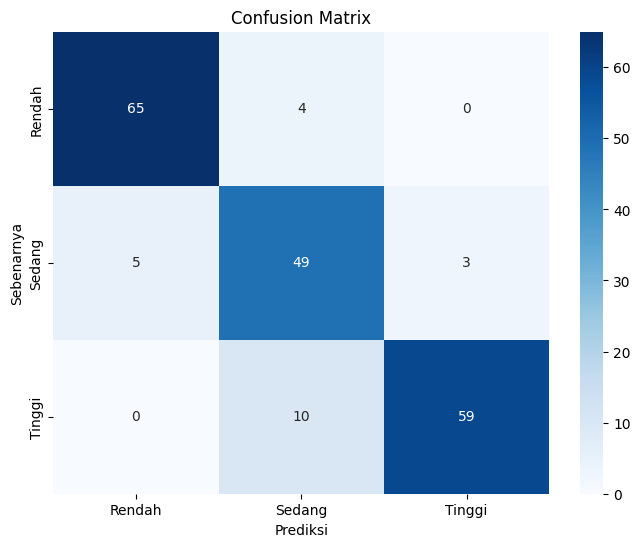

In [5]:
# Evaluasi model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix")
plt.show()
